In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def show(image, x=30, y=7):
    plt.figure(figsize=(x, y))
    plt.imshow(image, cmap="gray")
    plt.show()

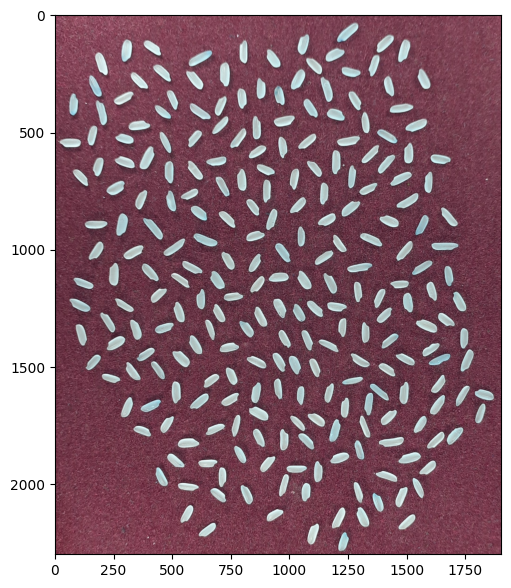

In [3]:
# Read the image
img = cv2.imread("rice.jpg") #the file must exist
show(img)

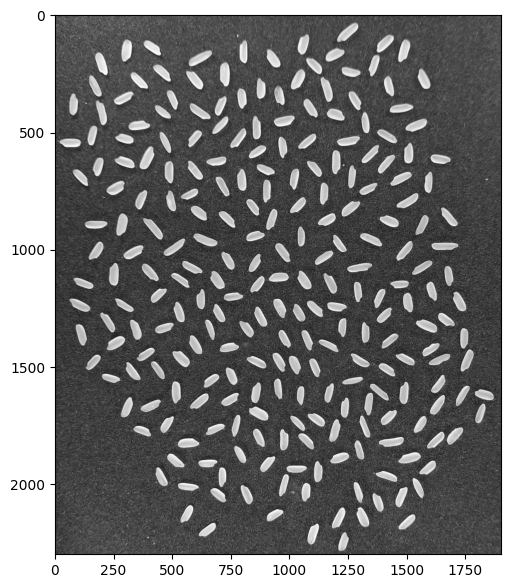

In [4]:
# Convert to grayscale
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(grayscale_image, 20, 7)

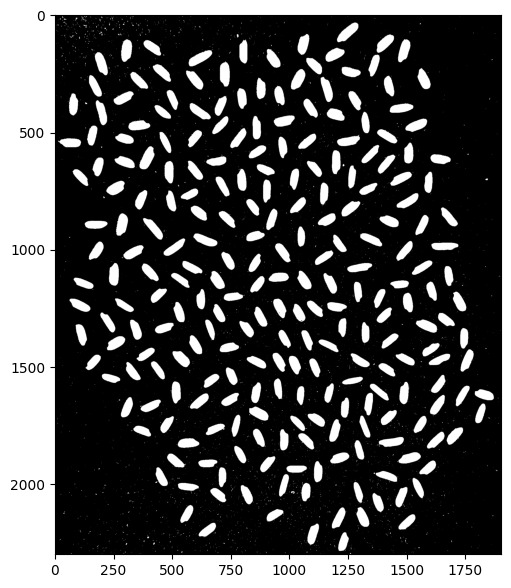

In [5]:
# Thresholding
_, thresh_img = cv2.threshold(grayscale_image, 120, 255, cv2.THRESH_BINARY)
show(thresh_img)


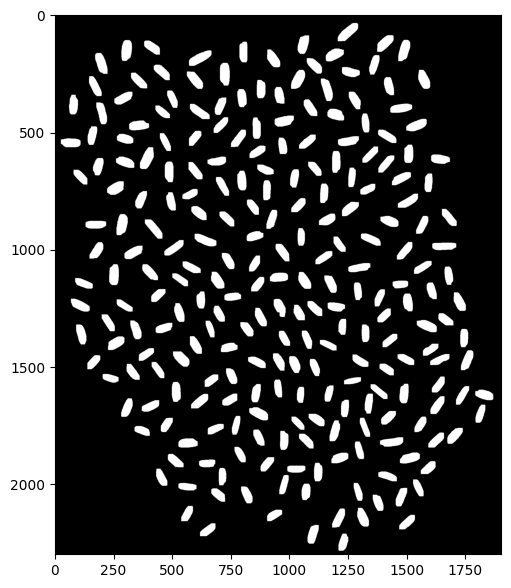

In [6]:

# Noise removal with morphological opening
kernel = np.ones((3, 3), np.uint8)
clear_image = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=8)
show(clear_image)

In [11]:
# Find contours
contours, _ = cv2.findContours(clear_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



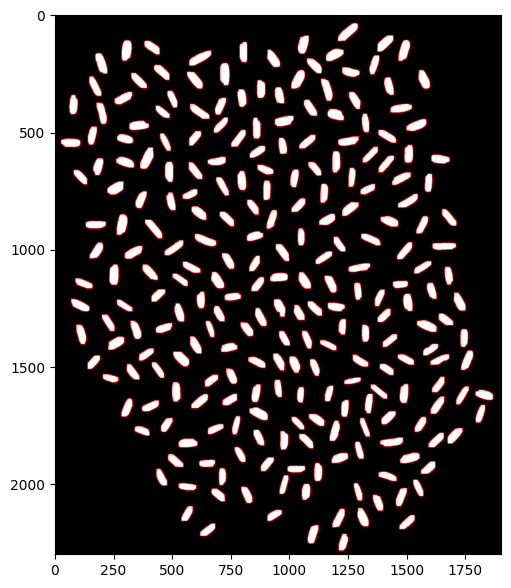

In [10]:
# Draw contours
output_contour = cv2.cvtColor(clear_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_contour, contours, -1, (255, 0, 0), 2)
show(output_contour)


In [13]:
# Print the number of detected contours (grains)
print("Number of detected contours (grains):", len(contours))

Number of detected contours (grains): 244


In [9]:
for index, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if len(contour) >= 5: #the cv2.fitEllipse function requires that the input contour has at least 5 points to fit an ellipse
        ellipse = cv2.fitEllipse(contour)
        (center, axes, orientation) = ellipse
        major_axis_length = max(axes)
        minor_axis_length = min(axes)

        # extracted features for each grain
        print(f"Grain {index+1} - Area: {area}, Perimeter: {perimeter}, Major Axis : {major_axis_length}, Minor Axis : {minor_axis_length}")

Grain 1 - Area: 2190.5, Perimeter: 198.4680359363556, Major Axis : 83.15299987792969, Minor Axis : 35.10503005981445
Grain 2 - Area: 2645.5, Perimeter: 222.1248903274536, Major Axis : 94.29962921142578, Minor Axis : 37.44432830810547
Grain 3 - Area: 2137.5, Perimeter: 199.92387890815735, Major Axis : 91.6292953491211, Minor Axis : 33.158958435058594
Grain 4 - Area: 2292.0, Perimeter: 212.99494862556458, Major Axis : 95.80594635009766, Minor Axis : 33.43954086303711
Grain 5 - Area: 2000.5, Perimeter: 190.95331716537476, Major Axis : 80.82215881347656, Minor Axis : 34.084869384765625
Grain 6 - Area: 2649.0, Perimeter: 230.5096664428711, Major Axis : 103.29808044433594, Minor Axis : 35.484947204589844
Grain 7 - Area: 2741.0, Perimeter: 220.85281205177307, Major Axis : 90.14703369140625, Minor Axis : 39.90878677368164
Grain 8 - Area: 2084.0, Perimeter: 195.53910374641418, Major Axis : 89.67425537109375, Minor Axis : 33.919677734375
Grain 9 - Area: 2205.5, Perimeter: 198.46803605556488, Maj

In [ ]:
for index, contour in enumerate(contours):
    area[index] = cv2.contourArea(contour)
    perimeter[index] = cv2.arcLength(contour, True)
    if len(contour) >= 5: #the cv2.fitEllipse function requires that the input contour has at least 5 points to fit an ellipse
        ellipse = cv2.fitEllipse(contour)
        (center, axes, orientation) = ellipse
        major_axis_length[index] = max(axes)
        minor_axis_length[index] = min(axes)

        # extracted features for each grain
        print(f"Grain {index+1} - Area: {area}, Perimeter: {perimeter}, Major Axis : {major_axis_length}, Minor Axis : {minor_axis_length}")